In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
df = pd.read_csv(r'/kaggle/input/3sec-features/3sec_features.csv')
df.head()

,name,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,actual_multi_genre
0,/kaggle/input/3sec-finals/Split_folder_final/1...,132300,0.415807,0.072298,0.272616,0.003458,1071.405850,124830.7978,1579.811905,172801.64380,...,32.417294,7.014239,27.476717,-1.217601,28.785315,0.618297,26.961672,-7.396918,28.644170,"Rock, Pop"
1,/kaggle/input/3sec-finals/Split_folder_final/1...,132300,0.411221,0.077621,0.271611,0.004101,1091.232379,251883.2784,1593.324615,294182.07410,...,27.733225,-1.383345,39.802162,-5.495392,36.830288,7.911010,34.455340,3.651210,35.311550,"Rock, Pop"
2,/kaggle/input/3sec-finals/Split_folder_final/1...,132300,0.511829,0.069412,0.291631,0.003943,1051.140250,114751.6252,1558.870991,152172.72120,...,30.249128,7.220845,25.881824,-2.801634,27.722574,2.708024,22.639078,-6.220536,39.085777,"Rock, Pop"
3,/kaggle/input/3sec-finals/Split_folder_final/1...,132300,0.449659,0.073253,0.333232,0.003267,967.553472,120096.4001,1449.365069,161182.69100,...,31.660627,-2.379893,34.448370,-2.409710,41.797516,2.381857,44.143787,-10.076764,60.215656,"Rock, Pop"
4,/kaggle/input/3sec-finals/Split_folder_final/1...,132300,0.406737,0.080221,0.327889,0.003120,959.808356,59398.2795,1426.996671,96487.01836,...,32.847797,3.834526,23.280157,-3.457653,32.983295,2.285278,20.172178,-6.665225,23.908913,"Rock, Pop"


In [3]:
rows = df.shape[0]
cols = df.shape[1]
print(f"Rows are: {rows} and columns are {cols}")

Rows are: 24620 and columns are 60


In [4]:
features = df.iloc[:,2:59]
features

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,0.415807,0.072298,0.272616,0.003458,1071.405850,124830.797800,1579.811905,172801.64380,2326.916174,1.133194e+06,...,-0.529794,32.417294,7.014239,27.476717,-1.217601,28.785315,0.618297,26.961672,-7.396918,28.644170
1,0.411221,0.077621,0.271611,0.004101,1091.232379,251883.278400,1593.324615,294182.07410,2458.027608,2.191394e+06,...,-6.527108,27.733225,-1.383345,39.802162,-5.495392,36.830288,7.911010,34.455340,3.651210,35.311550
2,0.511829,0.069412,0.291631,0.003943,1051.140250,114751.625200,1558.870991,152172.72120,2239.286845,9.873727e+05,...,4.105564,30.249128,7.220845,25.881824,-2.801634,27.722574,2.708024,22.639078,-6.220536,39.085777
3,0.449659,0.073253,0.333232,0.003267,967.553472,120096.400100,1449.365069,161182.69100,1997.266945,9.988308e+05,...,-6.826433,31.660627,-2.379893,34.448370,-2.409710,41.797516,2.381857,44.143787,-10.076764,60.215656
4,0.406737,0.080221,0.327889,0.003120,959.808356,59398.279500,1426.996671,96487.01836,1878.834327,5.051104e+05,...,-2.525133,32.847797,3.834526,23.280157,-3.457653,32.983295,2.285278,20.172178,-6.665225,23.908913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24615,0.295226,0.094016,0.021039,0.000056,291.978067,10063.002590,611.850135,24364.56725,375.542388,5.932551e+04,...,4.876591,38.339024,5.372583,25.366219,1.952211,50.508247,-0.673771,79.792470,-5.530555,63.067703
24616,0.283132,0.083223,0.052595,0.000264,292.447448,1168.048694,262.158416,9734.02002,420.105310,5.018519e+03,...,-2.352866,22.237856,3.869124,25.358006,3.410983,40.967182,-2.775848,40.147373,-6.390646,55.431150
24617,0.240055,0.079368,0.045204,0.000315,306.645198,7032.938495,349.910501,23974.73184,463.296426,2.565619e+04,...,-6.420828,44.450710,-6.042143,48.116177,-4.489713,37.759995,-2.741151,33.541245,-1.366368,44.849674
24618,0.285041,0.085068,0.033291,0.000050,235.185748,4547.305221,232.738334,26629.64422,349.685916,1.492662e+04,...,-18.476357,16.999535,-14.717143,21.652325,-9.331166,25.001644,-9.926890,16.550720,-9.825608,11.176955


In [5]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to your data to compute the mean and standard deviation
scaler.fit(features)

# Transform (normalize) your data
features = scaler.transform(features)

In [35]:
print(features)

[[-0.23778143 -0.56958284  1.39860879 ... -0.64350893 -0.78104998
  -0.60403813]
 [-0.2823771  -0.19301091  1.38597871 ... -0.405898    1.4735443
  -0.39272929]
 [ 0.69592554 -0.77372126  1.63751961 ... -0.78057072 -0.54098536
  -0.27311295]
 ...
 [-1.94678015 -0.06945085 -1.45868283 ... -0.43488233  0.44960593
  -0.09043814]
 [-1.50934026  0.3337232  -1.60835611 ... -0.97362175 -1.27667336
  -1.15762545]
 [-1.51104982  0.4774126  -1.46243548 ... -0.65832789 -1.6726923
  -0.4270052 ]]


In [7]:
genres = df['actual_multi_genre']
genres[342]

'Rock, Metal'

In [24]:
set_genre = set()
for i in genres:
    set_genre = set_genre.union(set((i.split(', '))))

# for genre in genres.split(','):
#     genre = genre.strip()  # Remove leading/trailing spaces
#     set_genre.add(genre)
actual_genre = list(set_genre)
print(*actual_genre,sep="\n")
print(f"The length is {len(actual_genre)}")

Pop
Classical
Jazz
Metal
Rock
Bebop
Rap & Hip-Hop
Dance & Electronic
Reggae
Folk
R&B
Country
Soul
Blues
Punk
The length is 15


# Using MultiLabelBinarizer

In [12]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
labels = df.iloc[:,59]
sample= mlb.fit_transform(labels)


array([[1, 0, 1, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [25]:
for genre in actual_genre:
    df[genre] = 0  # Initialize all new columns with 0
def one_hot_encode(row):
    for genre in row['actual_multi_genre'].split(', '):
        if genre in actual_genre:
            row[genre] = 1
    return row

df = df.apply(one_hot_encode, axis=1)

In [26]:
df.drop('actual_multi_genre', axis=1,inplace=True)

In [27]:
df.head()

,name,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,Bebop,Rap & Hip-Hop,Dance & Electronic,Reggae,Folk,R&B,Country,Soul,Blues,Punk
0,/kaggle/input/3sec-finals/Split_folder_final/1...,132300,0.415807,0.072298,0.272616,0.003458,1071.405850,124830.7978,1579.811905,172801.64380,...,0,0,0,0,0,0,0,0,0,0
1,/kaggle/input/3sec-finals/Split_folder_final/1...,132300,0.411221,0.077621,0.271611,0.004101,1091.232379,251883.2784,1593.324615,294182.07410,...,0,0,0,0,0,0,0,0,0,0
2,/kaggle/input/3sec-finals/Split_folder_final/1...,132300,0.511829,0.069412,0.291631,0.003943,1051.140250,114751.6252,1558.870991,152172.72120,...,0,0,0,0,0,0,0,0,0,0
3,/kaggle/input/3sec-finals/Split_folder_final/1...,132300,0.449659,0.073253,0.333232,0.003267,967.553472,120096.4001,1449.365069,161182.69100,...,0,0,0,0,0,0,0,0,0,0
4,/kaggle/input/3sec-finals/Split_folder_final/1...,132300,0.406737,0.080221,0.327889,0.003120,959.808356,59398.2795,1426.996671,96487.01836,...,0,0,0,0,0,0,0,0,0,0


In [34]:
labels = df.iloc[:,59:75]
print(*labels,sep="\n")
labels = labels.values
print(labels)

Pop
Classical
Jazz
Metal
Rock
Bebop
Rap & Hip-Hop
Dance & Electronic
Reggae
Folk
R&B
Country
Soul
Blues
Punk
[[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]]


In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.33, random_state=42)

# Simple Neural Network - No BatchNormalization

In [29]:
# Imports
from sklearn.datasets import make_multilabel_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.optimizers import Adam

# Configuration options
n_features = 57
n_classes = 15
n_labels = 15
n_epochs = 500
random_state = 42
batch_size = 250
verbosity = 1
validation_split = 0.2

# Create dataset
# Split into training and testing data

# Data Preprocessing: Normalize the input features


# Create the model with a more complex architecture
model = Sequential()
model.add(Dense(512, activation='relu', input_dim=n_features))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(n_classes, activation='sigmoid'))

# Compile the model
model.compile(loss=binary_crossentropy,
              optimizer=Adam(),
              metrics=['accuracy'])

# Fit data to model
model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=n_epochs,
          verbose=verbosity,
          validation_split=validation_split)

# Generate generalization metrics
score = model.evaluate(X_test, y_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')


Epoch 1/500
53/53 [==============================] - 2s 13ms/step - loss: 0.4006 - accuracy: 0.1199 - val_loss: 0.3019 - val_accuracy: 0.1219
Epoch 2/500
53/53 [==============================] - 1s 10ms/step - loss: 0.2837 - accuracy: 0.1947 - val_loss: 0.2753 - val_accuracy: 0.1697
Epoch 3/500
53/53 [==============================] - 1s 9ms/step - loss: 0.2623 - accuracy: 0.2149 - val_loss: 0.2610 - val_accuracy: 0.2777
Epoch 4/500
53/53 [==============================] - 0s 9ms/step - loss: 0.2469 - accuracy: 0.2361 - val_loss: 0.2502 - val_accuracy: 0.2264
Epoch 5/500
53/53 [==============================] - 0s 9ms/step - loss: 0.2339 - accuracy: 0.2417 - val_loss: 0.2408 - val_accuracy: 0.2143
Epoch 6/500
53/53 [==============================] - 0s 9ms/step - loss: 0.2202 - accuracy: 0.2446 - val_loss: 0.2320 - val_accuracy: 0.2380
Epoch 7/500
53/53 [==============================] - 0s 9ms/step - loss: 0.2085 - accuracy: 0.2532 - val_loss: 0.2276 - val_accuracy: 0.2801
Epoch 8/500

KeyboardInterrupt: 

# Simple Neural Network

In [30]:
# Imports
from sklearn.datasets import make_multilabel_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.optimizers import Adam

# Configuration options
n_features = 57
n_classes = 15
n_labels = 15
n_epochs = 500
random_state = 42
batch_size = 250
verbosity = 1
validation_split = 0.2

# Create the model with batch normalization layers
model = Sequential()
model.add(Dense(512, activation='relu', input_dim=n_features))
model.add(BatchNormalization())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(n_classes, activation='sigmoid'))

# Compile the model
model.compile(loss=binary_crossentropy,
              optimizer=Adam(),
              metrics=['accuracy'])

# Fit data to model
model.fit(X_train, y_train, batch_size=batch_size, epochs=n_epochs, verbose=verbosity,
          validation_split=validation_split)

# Generate generalization metrics
score = model.evaluate(X_test, y_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')


Epoch 1/500
53/53 [==============================] - 4s 22ms/step - loss: 0.6789 - accuracy: 0.2337 - val_loss: 0.6248 - val_accuracy: 0.3052
Epoch 2/500
53/53 [==============================] - 1s 15ms/step - loss: 0.5626 - accuracy: 0.3416 - val_loss: 0.5166 - val_accuracy: 0.2752
Epoch 3/500
53/53 [==============================] - 1s 14ms/step - loss: 0.4352 - accuracy: 0.3555 - val_loss: 0.3794 - val_accuracy: 0.2334
Epoch 4/500
53/53 [==============================] - 1s 13ms/step - loss: 0.3140 - accuracy: 0.3274 - val_loss: 0.2969 - val_accuracy: 0.1846
Epoch 5/500
53/53 [==============================] - 1s 13ms/step - loss: 0.2425 - accuracy: 0.3092 - val_loss: 0.2550 - val_accuracy: 0.2152
Epoch 6/500
53/53 [==============================] - 1s 13ms/step - loss: 0.2055 - accuracy: 0.3040 - val_loss: 0.2324 - val_accuracy: 0.2158
Epoch 7/500
53/53 [==============================] - 1s 13ms/step - loss: 0.1816 - accuracy: 0.3173 - val_loss: 0.2168 - val_accuracy: 0.2943
Epoch 

KeyboardInterrupt: 

# CRNN 

In [32]:
# Imports
import numpy as np
from sklearn.datasets import make_multilabel_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, LSTM, Dense
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.optimizers import Adam

# Configuration options
n_features = 57
n_classes = 15
n_labels = 15
n_epochs = 50
random_state = 42
batch_size = 32
verbosity = 1
validation_split = 0.2


# Reshape the input data for 1D convolution
X_train = X_train[:, :, np.newaxis]
X_test = X_test[:, :, np.newaxis]

# Create the CRNN model
model = Sequential()

# Convolutional layers for feature extraction
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(n_features, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())

# Recurrent layers (LSTM) for handling sequential data
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(64))

# Fully connected layers for classification
model.add(Dense(128, activation='relu'))
model.add(Dense(n_classes, activation='sigmoid'))

# Compile the model
model.compile(loss=binary_crossentropy,
              optimizer=Adam(),
              metrics=['accuracy'])

# Fit data to model
model.fit(X_train, y_train, batch_size=batch_size, epochs=n_epochs, verbose=verbosity,
          validation_split=validation_split)

# Generate generalization metrics
score = model.evaluate(X_test, y_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')


ValueError: Input 0 of layer "lstm" is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 864)

# Simple CNN

In [38]:
# Imports
import numpy as np
from sklearn.datasets import make_multilabel_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.optimizers import Adam

In [43]:
n_features = 57
n_classes = 15
n_labels = 15
n_epochs = 50
random_state = 42
batch_size = 32
verbosity = 1
validation_split = 0.2
# Create dataset
X, y = make_multilabel_classification(n_samples=1000, n_features=n_features, n_classes=n_classes, n_labels=n_labels, random_state=random_state)

# Split into training and testing data
A_train, A_test, B_train, B_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

# Data Preprocessing: Normalize the input features
scaler = StandardScaler()
A_train = scaler.fit_transform(A_train)
A_test = scaler.transform(A_test)

# Reshape the input data for 1D convolution
A_train = A_train[:, :, np.newaxis]
A_test = A_test[:, :, np.newaxis]


In [44]:
print(A_train.shape)
print(X_train.shape)

(800, 57, 1)
(16495, 57)


In [47]:
X_train = X_train[:, :, np.newaxis]
X_test = X_test[:, :, np.newaxis]

In [54]:
print(len(X_train[1]))

57


In [49]:


# Configuration options
n_features = 57
n_classes = 15
n_labels = 15
n_epochs = 50
random_state = 42
batch_size = 32
verbosity = 1
validation_split = 0.2


# Create the basic CNN model
model = Sequential()

# Convolutional layer for feature extraction
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(n_features, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())

# Fully connected layer for classification
model.add(Dense(n_classes, activation='sigmoid'))

# Compile the model
model.compile(loss=binary_crossentropy,
              optimizer=Adam(),
              metrics=['accuracy'])

# Fit data to model
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=n_epochs, verbose=verbosity,
          validation_split=validation_split)

# Generate generalization metrics
score = model.evaluate(X_test, y_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')


Epoch 1/50
413/413 [==============================] - 3s 5ms/step - loss: 0.3039 - accuracy: 0.8763 - val_loss: 0.2788 - val_accuracy: 0.8672
Epoch 2/50
413/413 [==============================] - 2s 5ms/step - loss: 0.2726 - accuracy: 0.8463 - val_loss: 0.2715 - val_accuracy: 0.7884
Epoch 3/50
413/413 [==============================] - 2s 5ms/step - loss: 0.2652 - accuracy: 0.8295 - val_loss: 0.2684 - val_accuracy: 0.8481
Epoch 4/50
413/413 [==============================] - 2s 5ms/step - loss: 0.2612 - accuracy: 0.8308 - val_loss: 0.2665 - val_accuracy: 0.7566
Epoch 5/50
413/413 [==============================] - 2s 5ms/step - loss: 0.2577 - accuracy: 0.8218 - val_loss: 0.2616 - val_accuracy: 0.8451
Epoch 6/50
413/413 [==============================] - 2s 5ms/step - loss: 0.2555 - accuracy: 0.8227 - val_loss: 0.2601 - val_accuracy: 0.8157
Epoch 7/50
413/413 [==============================] - 2s 5ms/step - loss: 0.2532 - accuracy: 0.8231 - val_loss: 0.2589 - val_accuracy: 0.8412
Epoch 

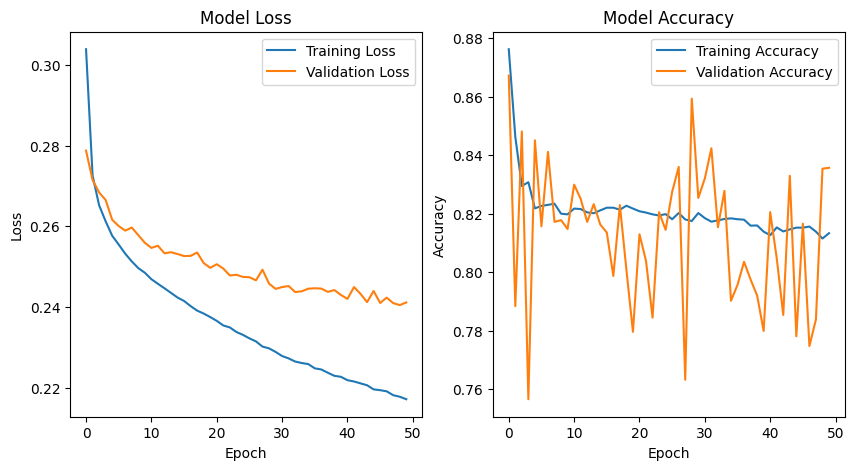

In [50]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()


# Simple CRNN

In [57]:
# Imports
import numpy as np
from sklearn.datasets import make_multilabel_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.optimizers import Adam

# Configuration options
n_features = 57
n_classes = 15
n_labels = 15
n_epochs = 10
random_state = 42
batch_size = 32
verbosity = 1
validation_split = 0.2

# Create the basic CRNN model
model = Sequential()

# Convolutional layer for feature extraction
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(n_features, 1)))
model.add(MaxPooling1D(pool_size=2))

# Recurrent layer (LSTM) for handling sequential data
model.add(LSTM(64))

# Fully connected layer for classification
model.add(Dense(n_classes, activation='sigmoid'))

# Compile the model
model.compile(loss=binary_crossentropy,
              optimizer=Adam(),
              metrics=['accuracy'])

# Fit data to model
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=n_epochs, verbose=verbosity,
          validation_split=validation_split)

# Generate generalization metrics
score = model.evaluate(X_test, y_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')


Epoch 1/10
413/413 [==============================] - 14s 26ms/step - loss: 0.3278 - accuracy: 0.8891 - val_loss: 0.3117 - val_accuracy: 0.9060
Epoch 2/10
413/413 [==============================] - 11s 26ms/step - loss: 0.3067 - accuracy: 0.9013 - val_loss: 0.3056 - val_accuracy: 0.9060
Epoch 3/10
413/413 [==============================] - 10s 24ms/step - loss: 0.3013 - accuracy: 0.9013 - val_loss: 0.2991 - val_accuracy: 0.8969
Epoch 4/10
413/413 [==============================] - 10s 25ms/step - loss: 0.2940 - accuracy: 0.8813 - val_loss: 0.2923 - val_accuracy: 0.8985
Epoch 5/10
413/413 [==============================] - 10s 24ms/step - loss: 0.2891 - accuracy: 0.8422 - val_loss: 0.2888 - val_accuracy: 0.7960
Epoch 6/10
413/413 [==============================] - 10s 24ms/step - loss: 0.2856 - accuracy: 0.8294 - val_loss: 0.2856 - val_accuracy: 0.8239
Epoch 7/10
413/413 [==============================] - 10s 25ms/step - loss: 0.2826 - accuracy: 0.8260 - val_loss: 0.2851 - val_accuracy:

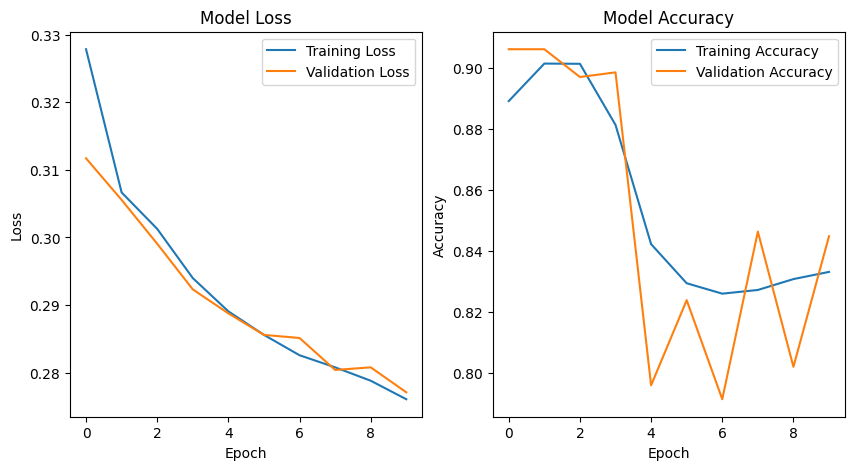

In [58]:
# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()


In [61]:
sample_input = features[1]
sample_input = sample_input[:, :, np.newaxis]

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [81]:
sample_input = X_train[1]
print(sample_input.shape)
sample_input = sample_input[:, :, np.newaxis]
# print(sample_input)

# Reshape the array to (1, 57, 1)
reshaped_array = sample_input.reshape(1, 57, 1)
print(reshaped_array.shape)

(57, 1)
(1, 57, 1)


In [82]:
print(y_train[1])

[1 0 0 0 1 0 0 0 0 0 0 0 0 1 0]


In [77]:
# sample_input = features[1]
# Make predictions

predictions = model.predict(reshaped_array)

# If you want to see the predicted labels, you can threshold the probabilities
# Assuming a threshold of 0.5 (adjust as needed)
threshold = 0.5
predicted_labels = (predictions > threshold).astype(int)

# Display the predictions
print("Predicted Probabilities:")
print(predictions)

print("Predicted Labels (using threshold of 0.5):")
print(predicted_labels)

1/1 [==============================] - 0s 33ms/step
Predicted Probabilities:
[[0.9582638  0.01165481 0.09063418 0.03216149 0.59011114 0.01839834
  0.01037552 0.1144572  0.00487155 0.33929682 0.06184028 0.28612918
  0.02562287 0.09368023 0.0217922 ]]
Predicted Labels (using threshold of 0.5):
[[1 0 0 0 1 0 0 0 0 0 0 0 0 0 0]]


In [70]:

# Assuming you have a trained model named 'model'

# Create a sample input data (modify this with your own data)
sample_input = np.random.rand(1, n_features)  # Replace with your actual sample data

# Data Preprocessing: Normalize the sample input
sample_input = scaler.transform(sample_input)  # Using the same scaler as during training
sample_input = sample_input[:, :, np.newaxis]

In [71]:
print(sample_input.shape)


(1, 57, 1)

In [69]:
import numpy as np


# Make predictions
predictions = model.predict(sample_input)

# If you want to see the predicted labels, you can threshold the probabilities
# Assuming a threshold of 0.5 (adjust as needed)
threshold = 0.5
predicted_labels = (predictions > threshold).astype(int)

# Display the predictions
print("Predicted Probabilities:")
print(predictions)

print("Predicted Labels (using threshold of 0.5):")
print(predicted_labels)


1/1 [==============================] - 1s 520ms/step
Predicted Probabilities:
[[0.89197934 0.01429654 0.15983573 0.07848556 0.5727879  0.0680067
  0.016301   0.03107138 0.0068107  0.16538472 0.15338767 0.10303307
  0.13219842 0.18834269 0.07253872]]
Predicted Labels (using threshold of 0.5):
[[1 0 0 0 1 0 0 0 0 0 0 0 0 0 0]]
